In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

def show_gray(*args, **kwargs):
    show(*args, cmap="gray", **kwargs)

def show(*args, **kwargs):
    import matplotlib.pyplot as plt
    if (len(args) == 1):
        plt.imshow(args[0], **kwargs)
    else:
        f, axis = plt.subplots(1,len(args))
        f.set_figheight(25)
        f.set_figwidth(25)
        for (image,i) in zip(args,range(len(args))):
            axis[i].imshow(image, **kwargs)
    plt.show()

# 1)

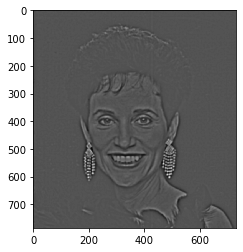

In [3]:
from skimage.util import random_noise
import skimage.filters as filters

I = imageio.imread("woman.png")
o = filters.gaussian(I,sigma=2) - filters.gaussian(I,sigma=5)

show_gray(o)

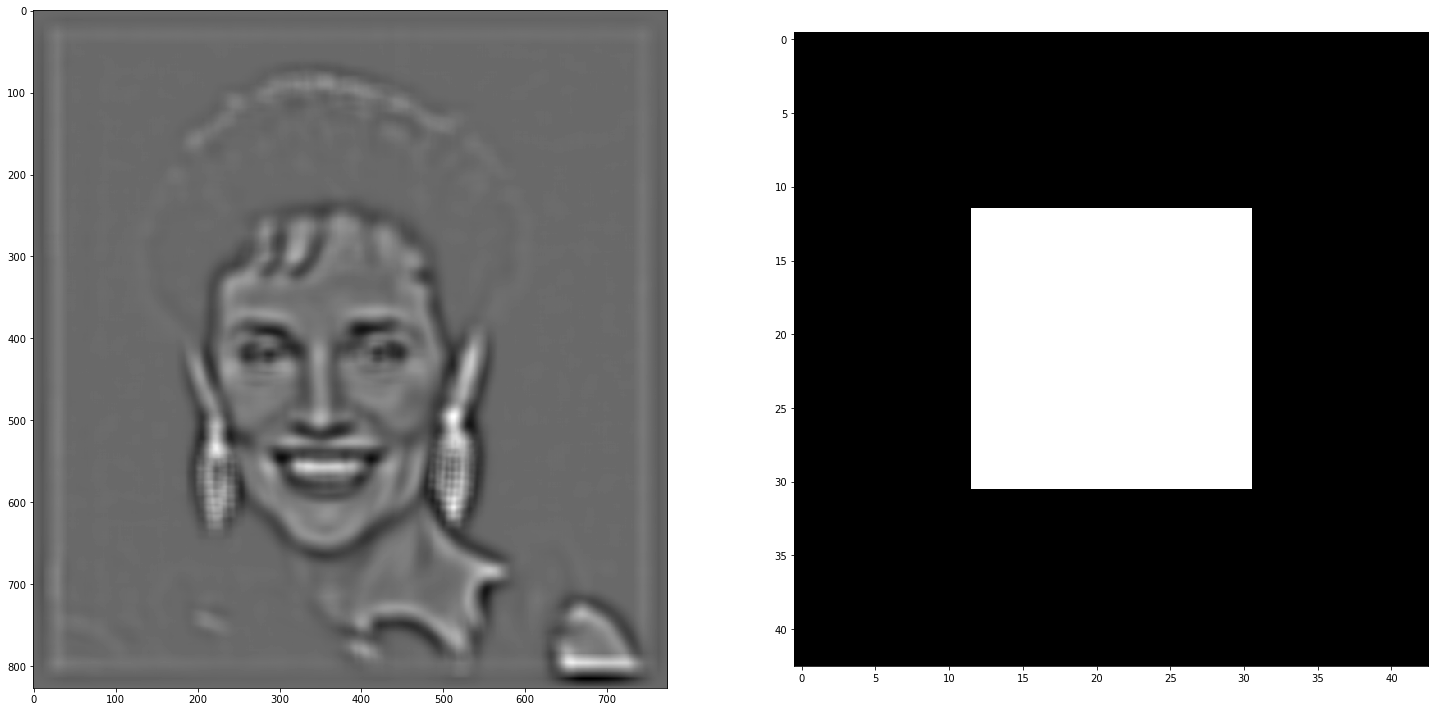

kernel [-0.0005408328826392645,0.0022292502198538104]


In [4]:
import math
import scipy.signal as skis

small = np.full((19,19), 1.0 / (19**2))
large = np.full((43,43), 1.0 / (43**2))
pad_size = math.floor((43-19) / 2)
kernel = np.pad(small, pad_size, mode="constant", constant_values=0) - large

m = skis.convolve2d(I, kernel)

show_gray(m, kernel)
print("kernel [", np.min(kernel), ",", np.max(kernel), "]", sep="")

In [8]:
filter = np.ones((3,3))
A = np.array([[1,2,3,4],[2,3,1,0],[3,1,2,1]], dtype=np.uint8)

B = np.array([[1,0,1,0],[4,5,6,8],[7,8,9,6]], dtype=np.uint8)

A_B = A+B
mA_B = filters.median(A_B, behavior="ndimage", mode="constant", cval=0, selem=filter)
mA = filters.median(A, behavior="ndimage", mode="constant", cval=0, selem=filter)
mB = filters.median(B, behavior="ndimage", mode="constant", cval=0, selem=filter)

#print(A)
#print(B)
#print(A_B)
#print(mA)
#print(mB)
#print(mA_B)

# 2)
## .1)

$A=\left[
    \begin{matrix}
    1 & 2 & 3 & 4\\
    2 & 3 & 1 & 0\\
    3 & 1 & 2 & 1
    \end{matrix}
\right]$
$B=\left[
    \begin{matrix}
    1 & 0 & 1 & 0\\
    4 & 5 & 6 & 8\\
    7 & 8 & 9 & 6
    \end{matrix}
\right]$

$A+B=\left[
    \begin{matrix}
    2 & 2 & 4 & 4\\
    6 & 8 & 7 & 8\\
    10 & 9 & 11 & 7
    \end{matrix}
\right]$
$median(A+B)=\left[
    \begin{matrix}
    0 & 2 & 4 & 0\\
    2 & 7 & 7 & 4\\
    0 & 7 & 7 & 0
    \end{matrix}
\right]$


$median(A)=\left[
    \begin{matrix}
    0 & 1 & 1 & 0\\
    1 & 2 & 2 & 1\\
    0 & 1 & 1 & 0
    \end{matrix}
\right]$
$median(B)=\left[
    \begin{matrix}
    0 & 1 & 0 & 0\\
    1 & 5 & 6 & 1\\
    0 & 5 & 6 & 0
    \end{matrix}
\right]$
$median(A)+median(B)=\left[
    \begin{matrix}
    0 & 2 & 1 & 0\\
    2 & 7 & 8 & 2\\
    0 & 6 & 7 & 0
    \end{matrix}
\right]$

## .2)

X is vertical edge detection.

Y is horizontal smoothing.

$ \left[ 
\begin{matrix}
 0 & 0 & 0 \\
-1 & 0 & 1 \\
 0 & 0 & 0
\end{matrix}
\right] 
*
\left[
    \begin{matrix}
 0 & 1 & 0 \\
 0 & 2 & 0 \\
 0 & 1 & 0
\end{matrix}
\right] = \left[
\begin{matrix}
 -1 & 0 & 1 \\
 -2 & 0 & 2 \\
 -1 & 0 & 1
\end{matrix}
\right]$

The result is the Sobel-Operator for vertical edge detection.


